In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Global_annual_population.csv")
df

,Year,Population,Unnamed: 2
0,1960,3.03,NaN
1,1961,3.07,NaN
2,1962,3.12,NaN
3,1963,3.19,NaN
4,1964,3.26,NaN
...,...,...,...
57,2017,7.52,NaN
58,2018,7.60,NaN
59,2019,7.68,NaN
60,2020,7.76,NaN


In [2]:
# Reading the Dataset
df = pd.read_csv("Global_annual_population.csv")

# First 5 rows in the DataFrame
df.head()

,Year,Population,Unnamed: 2
0,1960,3.03,NaN
1,1961,3.07,NaN
2,1962,3.12,NaN
3,1963,3.19,NaN
4,1964,3.26,NaN


In [3]:
# Checking Shape of the DataFrame
df.shape

(62, 3)

In [4]:
# Checking for Null values in the DataFrame
df.isna().sum()

Year            0
 Population     0
Unnamed: 2     62
dtype: int64

In [5]:
# Checking for correlation between columns
df.corr()

,Year,Population,Unnamed: 2
Year,1.000000,0.999597,NaN
Population,0.999597,1.000000,NaN
Unnamed: 2,NaN,NaN,NaN


In [7]:
# There is clear positive correlation between "Year" and "Population"

# Dropping "Unnamed: 2" column
df.drop("Unnamed: 2", axis=1, inplace=True)

In [7]:
# Dataset Summary

# First 5 records in the DataFrame
df.head().T

,0,1,2,3,4
Year,1960.00,1961.00,1962.00,1963.00,1964.00
Population,3.03,3.07,3.12,3.19,3.26


In [8]:
# Statistical Information about the Dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,62.0,1990.500000,18.041619,1960.00,1975.25,1990.500,2005.75,2021.00
Population,62.0,5.341774,1.457241,3.03,4.08,5.325,6.57,7.84


In [9]:
# EDA and Visualizations

# Years in the DataFrame
df['Year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [10]:
# No. of Years data in the DataFrame
df['Year'].nunique()

62

In [11]:
# Population

# Max Population in the DataFrame
max_population = max(df[' Population'])
print(f"Max Population in the DataFrame: {max_population}")

Max Population in the DataFrame: 7.84


In [12]:
# Max Population in the DataFrame and the year
max_population_year = df[df[' Population']==max_population]['Year'].values[0]
print(f"Year with Max Population: {max_population_year}")

Year with Max Population: 2021


In [13]:
# Min Population in the DataFrame
min_population = min(df[' Population'])
print(f"Min Population in the DataFrame: {min_population}")

Min Population in the DataFrame: 3.03


In [14]:
# Min Population in the DataFrame and the year
min_population_year = df[df[' Population']==min_population]['Year'].values[0]
print(f"Year with Min Population: {min_population_year}")

Year with Min Population: 1960


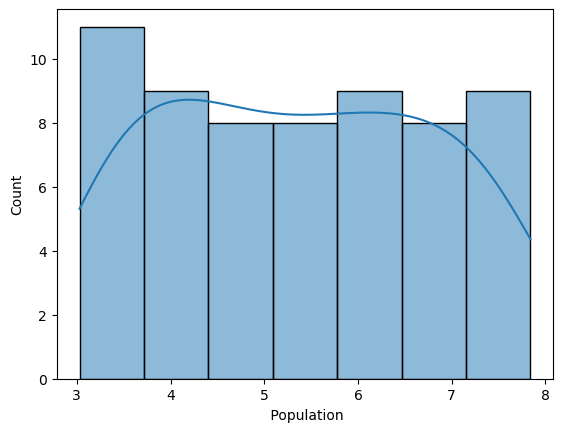

In [14]:
# The Population looks clearly correlated with Year

# Histogram for 'Population' Column
sns.histplot(df[' Population'], kde=True)
plt.show()

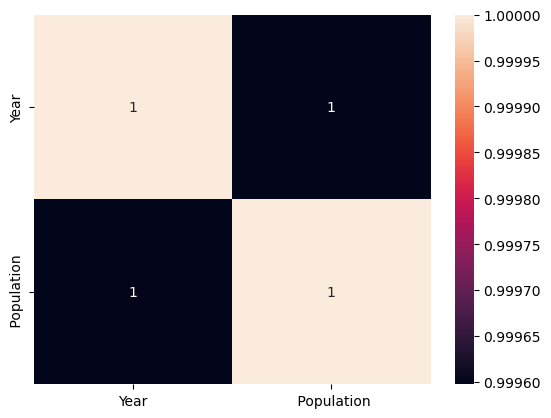

In [18]:
# Heatmap for "Population" and "Year"
sns.heatmap(df.corr(), annot=True)
plt.show()

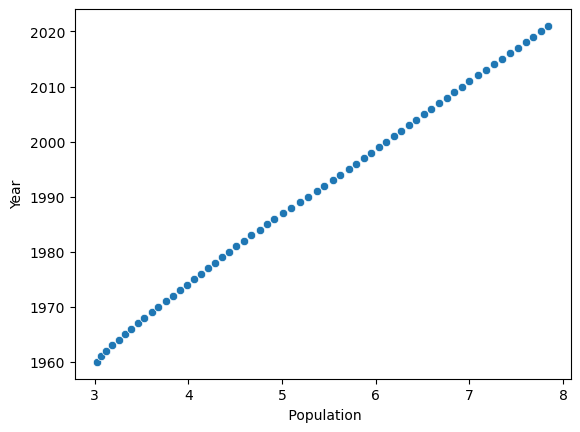

In [17]:
# The Positive correlation between the two columns can be seen easily from the graph

# Population Vs. Year

# Scatter Plot - Population Vs. Year
sns.scatterplot(data=df, x=' Population', y='Year')
plt.show()

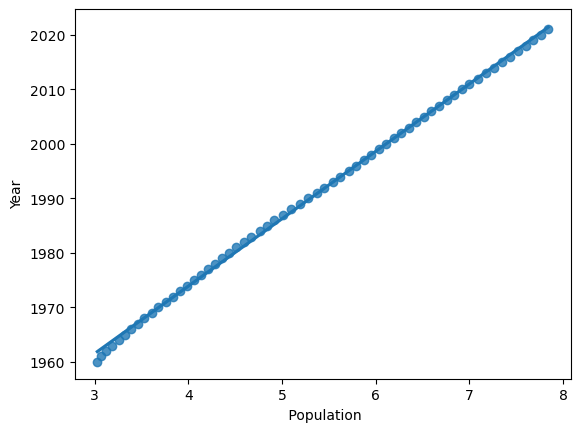

In [18]:
# Reg Plot - Population Vs. Year
sns.regplot(data=df, x=' Population', y='Year')
plt.show()

In [20]:
# Since the Population looks clearly correlated with Year and Reg.line in the above graph fits all the data points fairly,
# so we can use "Linear Regression" model for machine learning predictions

# Splitting Data (X and y)
X = df[[' Population']]
y = df['Year']

In [21]:
# ML Model
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X, y)

LinearRegression()

In [22]:
# Train Predictions
train_predictions = lin_model.predict(X)

In [41]:
# Error Metrics (Train Data)
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [42]:
print("Mean Absolute Error: ", mean_absolute_error(y, train_predictions))
print()
print("Mean Squared Error: ", mean_squared_error(y, train_predictions))
print()
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y, train_predictions)))


Mean Absolute Error:  0.35208643692326846

Mean Squared Error:  0.2577924077491355

Root Mean Squared Error:  0.5077326144233159


In [26]:
# Test Predictions
test_predictions_2022 = np.round(lin_model.predict(np.array([[2022]])), 2)
print("Test Prediction for 2022:", test_predictions_2022)

Test Prediction for 2022: [26948.02]


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
test_predictions_2050 = np.round(lin_model.predict(np.array([[2050]])), 2)
print("Test Prediction for 2050:", test_predictions_2050)



Test Prediction for 2050: [27294.54]


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
test_predictions_2100 = np.round(lin_model.predict(np.array([[2100]])), 2)
print("Test Prediction for 2100:", test_predictions_2100)



Test Prediction for 2100: [27913.32]


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Insights
## The world's population continues to grow, but the pace of growth is slowing down
## The world's population is projected to reach 8 billion on 15 November 2022.
## In 2030, 9.7 billion in 2050, and 10.4 billion in 2100.


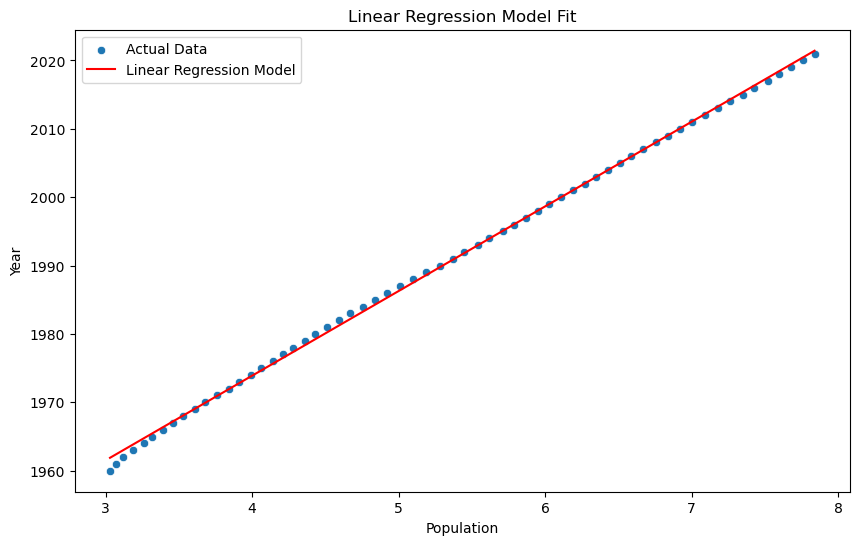

In [28]:
# Visualize Predictions on Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[' Population'], y=y, label='Actual Data')
sns.lineplot(x=X[' Population'], y=lin_model.predict(X), color='red', label='Linear Regression Model')
plt.title('Linear Regression Model Fit')
plt.xlabel('Population')
plt.ylabel('Year')
plt.legend()
plt.show()
